In [1]:
import pandas as pd
import gspread
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)
def first_substring(strings, substring):
    return next(i for i, string in enumerate(strings) if substring in string)

sa = gspread.service_account(filename='../../../data_processing/lk-indicators-585e699aa78d.json')
sh = sa.open('fiscal_data')
wks_r = sh.worksheet('revenue')
wks_e = sh.worksheet('expenditure')

# Fiscal Sector

In [2]:
revenue = pd.DataFrame(wks_r.get_all_records())
expenditure =pd.DataFrame(wks_e.get_all_records())
fiscal = revenue.merge(expenditure,left_on='year',right_on='year')

## Government Income

Text(0, 0.5, 'RS millions')

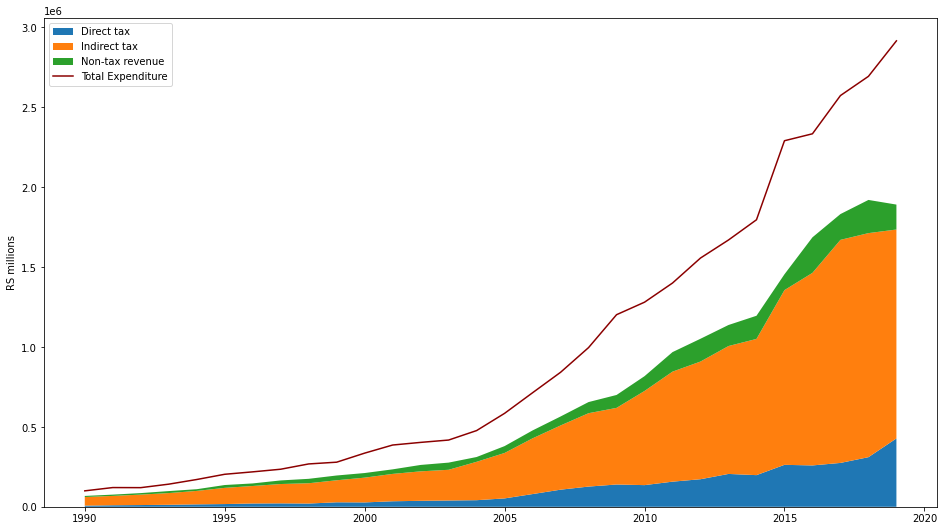

In [3]:
plt.stackplot(  fiscal['year'],
                fiscal['direct_tax'].astype(float),
                fiscal['indirect_tax'].astype(float),
                fiscal['non_tax_revenue'].astype(float),
                labels=['Direct tax','Indirect tax','Non-tax revenue'],
                )
plt.plot(fiscal['year'],fiscal['total_y'],label="Total Expenditure",color="darkred")                
plt.legend(loc='upper left')
plt.ylabel("RS millions")

## Government Expenditure

Text(0, 0.5, 'RS millions')

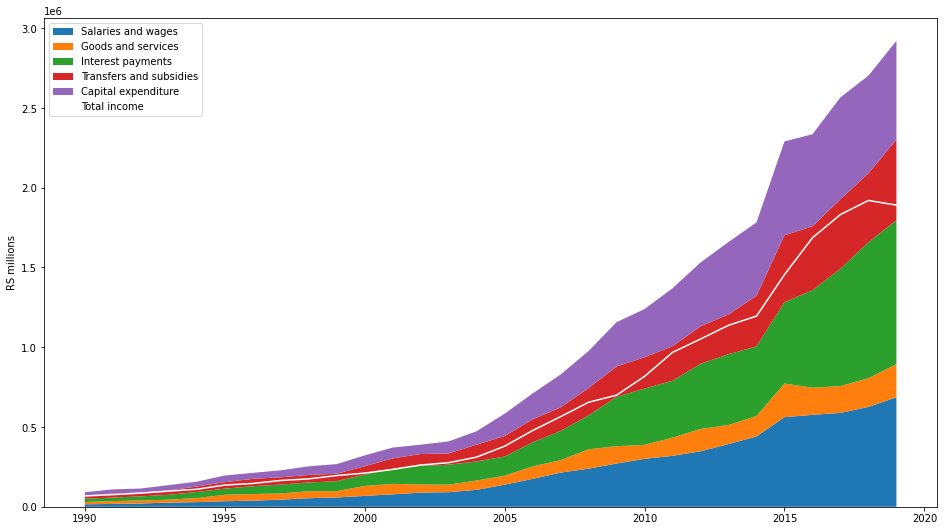

In [4]:
plt.stackplot(  fiscal['year'],
                fiscal['salaries_wages'].astype(float),
                fiscal['goods_services'].astype(float),
                fiscal['interest_payments'].astype(float),
                fiscal['transfers_subsidies'].astype(float),
                fiscal['total_capital'].astype(float),
                labels=['Salaries and wages','Goods and services','Interest payments','Transfers and subsidies','Capital expenditure'],
                )
plt.plot(fiscal['year'],fiscal['total_x']+fiscal['non_tax_revenue'],label="Total income",color="white")                
plt.legend(loc='upper left')
plt.ylabel("RS millions")